In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')



In [3]:
df_digi = getDF("C:/Users/Sneha/Downloads/reviews_Digital_Music.json.gz")

In [4]:
df_digi.shape

(836006, 9)

In [5]:
df_digi.isnull().sum()

reviewerID           0
asin                 0
reviewerName      2420
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [6]:
df_inst = getDF("C:/Users/Sneha/Downloads/reviews_Musical_Instruments.json.gz")

In [7]:
df_inst.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YS9MDZP93857,0006428320,John Taylor,"[0, 0]",The portfolio is fine except for the fact that...,3.0,Parts missing,1394496000,"03 11, 2014"
1,A3TS466QBAWB9D,0014072149,Silver Pencil,"[0, 0]",If you are a serious violin student on a budge...,5.0,"Perform it with a friend, today!",1370476800,"06 6, 2013"
2,A3BUDYITWUSIS7,0041291905,joyce gabriel cornett,"[0, 0]",This is and excellent edition and perfectly tr...,5.0,Vivalldi's Four Seasons,1381708800,"10 14, 2013"
3,A19K10Z0D2NTZK,0041913574,TexasCowboy,"[0, 0]",Perfect for someone who is an opera fan or a w...,5.0,Full score: voice and orchestra,1285200000,"09 23, 2010"
4,A14X336IB4JD89,0201891859,dfjm53,"[0, 1]",How many Nocturnes does it contain? All of the...,1.0,Unable to determine contents,1350432000,"10 17, 2012"


In [8]:
f=df_inst[df_inst['overall']==5.0]

In [9]:
vc=f.asin.value_counts()

In [10]:
df_vc=pd.DataFrame(vc)
df_vc.head(10)

,asin
B000ULAP4U,2829
B003VWJ2K8,1780
B003VWKPHC,1235
B00FPPQYXM,1077
B009E3EWPI,967
B001MSS6CS,931
1417030321,916
B002VA464S,765
B00063678K,652
B000SKO0OY,615


In [11]:
df_inst[df_inst['asin']=='B000ULAP4U']

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
180851,A2RCXXH309JREN,B000ULAP4U,NaN,"[0, 0]","Awesome headphones lol, its been maybe a year ...",5.0,"2 Years later, still works excellent.",1405814400,"07 20, 2014"
180852,A17Q6MAIXCHPYC,B000ULAP4U,NaN,"[0, 0]",Best quality sound and design for the price!,5.0,Amazing headphones!,1405209600,"07 13, 2014"
180853,A3MFCSHSBKRQGF,B000ULAP4U,NaN,"[0, 0]",Excellent great product,5.0,sweetness! !,1405296000,"07 14, 2014"
180854,A1K20CWBK2P3K9,B000ULAP4U,NaN,"[0, 0]","For the price, these headphones are perfect.PR...",5.0,Can they one up the M50's?,1405296000,"07 14, 2014"
180855,A38SUH1AHD8UF9,B000ULAP4U,NaN,"[0, 0]",great quality headphones had them for a year n...,5.0,Quality Great Headphones,1405209600,"07 13, 2014"
...,...,...,...,...,...,...,...,...,...
184369,A2APS8XYSD9V2E,B000ULAP4U,ZooM,"[0, 0]",These headphones are great. They produce good ...,5.0,Great Product and Great Price,1358985600,"01 24, 2013"
184370,A9JNER8BSCPSY,B000ULAP4U,zshakir,"[0, 3]","I am an audiophile, and purchased these in coi...",2.0,mediocre sound quality for the price (do not w...,1395532800,"03 23, 2014"
184371,A3RDT4OPWURUIQ,B000ULAP4U,Ztronics901.Jr,"[0, 0]",After having AT Pro-70 cardioid condenser inst...,5.0,High Quality Smooth Sound,1380844800,"10 4, 2013"
184372,A1GH60K2ZMU9M6,B000ULAP4U,Zurk,"[0, 0]",I have been listening to these headphones for ...,5.0,awesome,1348531200,"09 25, 2012"


In [12]:
df_inst.isnull().sum()

reviewerID           0
asin                 0
reviewerName      2586
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
   
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    pos_score=vs['pos']
    neg_score = vs['neg']
    neu_score = vs['neu']
    return pos_score,neg_score,neu_score

def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'positive'
    elif (score >= 0) and (score < 0.5):
        return 'neutral'
    elif (score < 0) and (score > -0.5):
        return "conflict"
    elif score <= -0.5:
        return 'negative'

In [14]:
digi_sample = df_digi[:300000]
inst_sample = df_inst[:300000]

In [15]:
digi_sample['Sentiment']=digi_sample['reviewText'].apply(lambda x: sentimental_Score(x))
inst_sample['Sentiment']=inst_sample['reviewText'].apply(lambda x: sentimental_Score(x))

In [16]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
digi_sample['pos_score'] = [analyzer.polarity_scores(i)['pos'] for i in digi_sample['reviewText']]
digi_sample['neg_score'] = [analyzer.polarity_scores(i)['neg'] for i in digi_sample['reviewText']]
digi_sample['neu_score'] = [analyzer.polarity_scores(i)['neu'] for i in digi_sample['reviewText']]

inst_sample['pos_score'] = [analyzer.polarity_scores(i)['pos'] for i in inst_sample['reviewText']]
inst_sample['neg_score'] = [analyzer.polarity_scores(i)['neg'] for i in inst_sample['reviewText']]
inst_sample['neu_score'] = [analyzer.polarity_scores(i)['neu'] for i in inst_sample['reviewText']]

In [18]:
digi_sample['con_score'] = (digi_sample['neu_score']+digi_sample['neg_score'])/2
inst_sample['con_score'] = (inst_sample['neu_score']+inst_sample['neg_score'])/2

In [19]:
digi_sample['compound_score'] = [analyzer.polarity_scores(i)['compound'] for i in digi_sample['reviewText']]
inst_sample['compound_score'] = [analyzer.polarity_scores(i)['compound'] for i in inst_sample['reviewText']]

In [26]:
digi_sample.Sentiment.value_counts()

positive    245081
neutral      29116
negative     13801
conflict     12002
Name: Sentiment, dtype: int64

In [27]:
inst_sample.Sentiment.value_counts()

positive    225165
neutral      41115
conflict     18011
negative     15709
Name: Sentiment, dtype: int64

In [28]:
pos_digi = digi_sample.loc[digi_sample['Sentiment'] == 'positive']
neg_digi = digi_sample.loc[digi_sample['Sentiment'] == 'negative']
neu_digi = digi_sample.loc[digi_sample['Sentiment'] == 'neutral']
con_digi = digi_sample.loc[digi_sample['Sentiment'] == 'conflict']

In [29]:
pos_inst = inst_sample.loc[inst_sample['Sentiment'] == 'positive']
neg_inst = inst_sample.loc[inst_sample['Sentiment'] == 'negative']
neu_inst = inst_sample.loc[inst_sample['Sentiment'] == 'neutral']
con_inst = inst_sample.loc[inst_sample['Sentiment'] == 'conflict']

In [30]:
digi = digi_sample
inst = inst_sample

In [31]:
inst.asin.value_counts()

B000ULAP4U    3523
B001MSS6CS    1420
1417030321    1218
B002VA464S    1066
B002024UDE     942
              ... 
B000K67UVQ       1
B000K67UR0       1
B000K67UGQ       1
B000K67UD4       1
B000KIZETO       1
Name: asin, Length: 44081, dtype: int64

In [32]:
inst.isnull().sum()

reviewerID               0
asin                     0
reviewerName          2053
helpful                  0
reviewText               0
overall                  0
summary                  0
unixReviewTime           0
reviewTime               0
Sentiment                0
pos_score                0
neg_score                0
neu_score                0
con_score                0
compound_score           0
Sentiment_sm             0
pos_score_sm             0
neg_score_sm             0
neu_score_sm             0
con_score_sm             0
compound_score_sum       0
dtype: int64

In [33]:
digi.drop(['reviewerName'],axis=1,inplace=True)

In [34]:
inst.drop(['reviewerName'],axis=1,inplace=True)

In [35]:
digi.dropna(inplace=True)

In [36]:
inst.dropna(inplace=True)

In [37]:
digi.isnull().sum()

reviewerID            0
asin                  0
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
Sentiment             0
pos_score             0
neg_score             0
neu_score             0
con_score             0
compound_score        0
Sentiment_sm          0
pos_score_sm          0
neg_score_sm          0
neu_score_sm          0
con_score_sm          0
compound_score_sum    0
dtype: int64

In [38]:
inst.isnull().sum()

reviewerID            0
asin                  0
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
Sentiment             0
pos_score             0
neg_score             0
neu_score             0
con_score             0
compound_score        0
Sentiment_sm          0
pos_score_sm          0
neg_score_sm          0
neu_score_sm          0
con_score_sm          0
compound_score_sum    0
dtype: int64

In [39]:
count_digi=digi['Sentiment'].value_counts()

In [40]:
count_inst=inst['Sentiment'].value_counts()

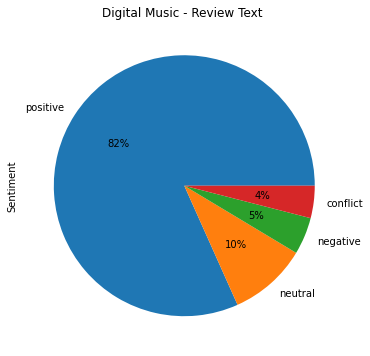

In [41]:
fig,ax=plt.subplots(figsize=(12,6))

count_digi.plot(kind='pie',autopct='%.0f%%')
plt.title("Digital Music - Review Text ")
plt.show()

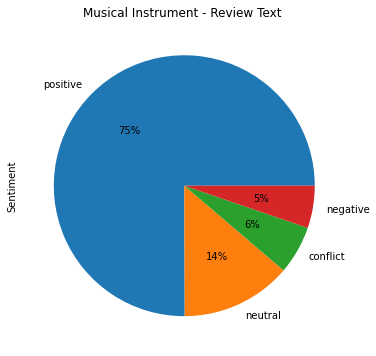

In [42]:
fig,ax=plt.subplots(figsize=(12,6))

count_inst.plot(kind='pie',autopct='%.0f%%')
plt.title("Musical Instrument - Review Text ")
plt.show()

In [43]:
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score,recall_score,f1_score, precision_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [44]:
def clean_text(text):
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    text = " ".join(text.split())
    text = text.lower()
    return text

In [45]:
digi['reviewText']=digi['reviewText'].apply(clean_text)
inst['reviewText']=inst['reviewText'].apply(clean_text)

In [46]:
digi['summary']=digi['summary'].apply(clean_text)
inst['summary']=inst['summary'].apply(clean_text)

In [47]:
x1 = digi['reviewText']
y1 = digi['Sentiment']

In [48]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=13)

In [49]:
#vectorizing
vectorizer = TfidfVectorizer(max_df=0.8, max_features=50000)

In [50]:
x1_train_v = vectorizer.fit_transform(x1_train)
x1_test_v = vectorizer.transform(x1_test)

In [51]:
lr1 = LogisticRegression(max_iter=250, verbose=1)
ovr1 = OneVsRestClassifier(lr1).fit(x1_train_v, y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s finished


In [52]:
y1_pred = ovr1.predict(x1_test_v)

In [53]:
df=pd.DataFrame({"Review":x1_test,"Actual_Sentiment":y1_test,"Predicted_label_lr":y1_pred}).reset_index(drop=True)
df

,Review,Actual_Sentiment,Predicted_label_lr
0,my goodness relax folks this is a very good qu...,positive,positive
1,this is a terrific album had it on vinyl in an...,positive,positive
2,van halen s self-titled debut is undoubtedly o...,positive,positive
3,the first thing you might notice about tranein...,positive,positive
4,the massacre is a well rounded album it delive...,positive,positive
...,...,...,...
59995,i was going to rate each song but then i reali...,positive,positive
59996,all eminem haters stop reading now and i ll se...,positive,positive
59997,blossom toes began life as a deliberately cute...,positive,positive
59998,ayo i ve gheard of these guys for years and i ...,positive,positive


In [54]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

    conflict       0.30      0.01      0.03      2425
    negative       0.64      0.33      0.44      2790
     neutral       0.49      0.28      0.35      5883
    positive       0.88      0.99      0.93     48902

    accuracy                           0.85     60000
   macro avg       0.58      0.40      0.44     60000
weighted avg       0.80      0.85      0.81     60000



In [55]:
mb1 = MultinomialNB()
ovr2 = OneVsRestClassifier(mb1).fit(x1_train_v, y1_train)

In [56]:
y2_pred = ovr2.predict(x1_test_v)

In [57]:
df["Predicted_label_naive_bayes"]=y2_pred


In [58]:
df.head()

,Review,Actual_Sentiment,Predicted_label_lr,Predicted_label_naive_bayes
0,my goodness relax folks this is a very good qu...,positive,positive,positive
1,this is a terrific album had it on vinyl in an...,positive,positive,positive
2,van halen s self-titled debut is undoubtedly o...,positive,positive,positive
3,the first thing you might notice about tranein...,positive,positive,positive
4,the massacre is a well rounded album it delive...,positive,positive,positive


In [59]:
print(classification_report(y1_test,y2_pred))

              precision    recall  f1-score   support

    conflict       0.00      0.00      0.00      2425
    negative       0.57      0.02      0.05      2790
     neutral       0.47      0.01      0.02      5883
    positive       0.82      1.00      0.90     48902

    accuracy                           0.82     60000
   macro avg       0.46      0.26      0.24     60000
weighted avg       0.74      0.82      0.74     60000



In [60]:
x2 = inst['reviewText']
y2 = inst['Sentiment']

In [61]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=13)

In [62]:
x2_train_v = vectorizer.fit_transform(x2_train)
x2_test_v = vectorizer.transform(x2_test)

In [63]:
lr2 = LogisticRegression(max_iter=250, verbose=1)
ovr3 = OneVsRestClassifier(lr2).fit(x2_train_v, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s finished


In [64]:
y3_pred = ovr3.predict(x2_test_v)

In [65]:
df_instru=pd.DataFrame({"Review":x2_test,"actual_sentiment":y2_test,"Predicted_lr":y3_pred}).reset_index(drop=True)

In [66]:
print(classification_report(y2_test,y3_pred))

              precision    recall  f1-score   support

    conflict       0.35      0.06      0.10      3644
    negative       0.63      0.39      0.48      3170
     neutral       0.50      0.37      0.43      8201
    positive       0.86      0.98      0.91     44985

    accuracy                           0.81     60000
   macro avg       0.58      0.45      0.48     60000
weighted avg       0.77      0.81      0.78     60000



In [67]:
mb2 = MultinomialNB()
ovr4 = OneVsRestClassifier(mb2).fit(x2_train_v, y2_train)

In [68]:
y4_pred = ovr4.predict(x2_test_v)

In [69]:
print(classification_report(y2_test,y4_pred))

              precision    recall  f1-score   support

    conflict       0.38      0.00      0.00      3644
    negative       0.50      0.00      0.01      3170
     neutral       0.46      0.01      0.02      8201
    positive       0.75      1.00      0.86     44985

    accuracy                           0.75     60000
   macro avg       0.52      0.25      0.22     60000
weighted avg       0.68      0.75      0.65     60000



In [70]:
df_instru['predicted_navebaiyes']=y4_pred


In [71]:
i=df_instru[df_instru['Predicted_lr']=='neutral'].reset_index(drop=True)
i.head(20)

,Review,actual_sentiment,Predicted_lr,predicted_navebaiyes
0,definatly not going to win any grammy s but i ...,negative,neutral,positive
1,what can i say you need a dust cover for your ...,positive,neutral,positive
2,my dad always said keep it simple so why didn ...,conflict,neutral,positive
3,product is in my opinion overpriced quality of...,conflict,neutral,positive
4,they are nice to look at but the texture of th...,neutral,neutral,positive
5,this solved the feedback issues i d been havin...,neutral,neutral,positive
6,don t know if it s my pc but this product does...,neutral,neutral,positive
7,next time i would go with basic wood and forge...,neutral,neutral,positive
8,good plugs bad cable i do not have more words ...,conflict,neutral,positive
9,,neutral,neutral,positive


In [72]:
i['Review'][4]

'they are nice to look at but the texture of the plastic doesn t suit my tastes for an actual functional plectrum'

In [73]:
print(classification_report(y2_test,y4_pred))

              precision    recall  f1-score   support

    conflict       0.38      0.00      0.00      3644
    negative       0.50      0.00      0.01      3170
     neutral       0.46      0.01      0.02      8201
    positive       0.75      1.00      0.86     44985

    accuracy                           0.75     60000
   macro avg       0.52      0.25      0.22     60000
weighted avg       0.68      0.75      0.65     60000



In [74]:
n=df[df['Predicted_label_lr']=='neutral'].reset_index(drop=True)
n.head(15)

,Review,Actual_Sentiment,Predicted_label_lr,Predicted_label_naive_bayes
0,evidently my download was temporary and is no ...,negative,neutral,positive
1,i was looking for this song for a while and by...,neutral,neutral,positive
2,uh no a mix-cd of things that spooky digs with...,neutral,neutral,positive
3,this is a classic southern rock album there is...,conflict,neutral,positive
4,the boss and the e-street band the chemistry i...,conflict,neutral,positive
5,dmx s debut album lit the rap game on fire and...,conflict,neutral,positive
6,i already know this a dope album but just wait...,neutral,neutral,positive
7,take fiona apple everything but the girl and a...,positive,neutral,positive
8,post stardom depression was a highly underrate...,conflict,neutral,positive
9,the opening chords of this song reminded me of...,neutral,neutral,positive


In [75]:
n['Review'][10]

'this cd first came out when i was ten and my brother was in to it in a big way as well as nwa and public enemy this cd bought back a lot of good memories for me i would recomend this to any one who is into hip hop not the modern crap that you get these days'

In [76]:
n['Review'][1]

'i was looking for this song for a while and by this artist'

In [77]:
digi_positive=digi[digi['Sentiment']=='positive'].reset_index()
digi_negative=digi[digi['Sentiment']=='negative'].reset_index()
digi_neutral=digi[digi['Sentiment']=='neutral'].reset_index()
digi_conflict=digi[digi['Sentiment']=='conflict'].reset_index()

In [78]:
inst_positive=inst[inst['Sentiment']=='positive'].reset_index()
inst_negative=inst[inst['Sentiment']=='negative'].reset_index()
inst_neutral=inst[inst['Sentiment']=='neutral'].reset_index()
inst_conflict=inst[inst['Sentiment']=='conflict'].reset_index()

In [79]:
x2_test

228347    looks like a theme description states pair onl...
89767     i received my chromonica this afternoon my mot...
52422     for the few people saying that this case is ba...
232796    i purchased these for my niece for her th birt...
203616    definatly not going to win any grammy s but i ...
                                ...                        
212455    besides its great looks this ukulele has an am...
151726    a friend and i have started to do some jam ses...
239174    a little on the bigger side put light stands w...
178670    i use the super fuzz to add some bite to my so...
109739    alright i wanted to get things straight here t...
Name: reviewText, Length: 60000, dtype: object

#### Positive words

In [80]:
import spacy
from spacy.lang.en import English
from spacy import displacy
nlp=spacy.load('en_core_web_sm')

import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [81]:
def words(data):
    adj=[]
    noun=[]
    adv=[]
    for token in data:
        doc=nlp (token)
    for i in doc:
        if i.pos_=='ADJ':
            adj.append(i.text)
        elif i.pos_=='NOUN':
            noun.append(i.text)
        elif i.pos_=='ADV':
            adv.append(i.text)
            
    return adj,noun,adv

In [82]:
pos=words(digi_positive.reviewText[:100])
pos

(['beautiful',
  'fitting',
  'clear',
  'airy',
  'previous',
  'excellent',
  'many',
  'great',
  'airy',
  'known',
  'long',
  'crisp',
  'pax',
  'medieval',
  'perfect',
  'upbeat',
  'other',
  'energetic',
  'opposite',
  'beautiful',
  'amazed',
  'new',
  'similar',
  'previous',
  'new',
  'more',
  'beautiful'],
 ['voices',
  'day',
  'voice',
  'style',
  'music',
  'bell',
  'voice',
  'light',
  'gaelic',
  'lot',
  'power',
  'voice',
  'music',
  'voice',
  'sound',
  'ability',
  'images',
  'note',
  'albums',
  'one',
  'songs',
  'album',
  'roses',
  'sound',
  'backing',
  'vocal',
  'arpeggio',
  'notes',
  'voice',
  'lyrics',
  'song',
  'tone',
  'crystal',
  'bell',
  'latin',
  'deorum',
  'sound',
  'voice',
  'singing',
  'background',
  'counterpoint',
  'lyrics',
  'sounds',
  'single',
  'album',
  'songs',
  'staccato',
  'song',
  'end',
  'spectrum',
  'hope',
  'place',
  'voice',
  'quality',
  'organ',
  'playing',
  'song',
  'albums',
  'ones'

In [83]:
words(inst_positive.reviewText[:160])


(['great', 'first', 'happier', 'other', 'vocal', 'awesome'],
 ['couldn', 't', 'instruction', 'series', 'thanks', 'dvd'],
 ['just', 'as', 'melissa', 'yet'])

#### Negative word

In [84]:
words(digi_negative.reviewText[0:10])

(['big', 'wonderfull', 'childish', 'rubbish', 'great', 'nice'],
 ['deal',
  'album',
  'production',
  'songwriting',
  'brial',
  'wilson',
  'lyrics',
  'masterpieces',
  'rest',
  'album',
  'background',
  'music'],
 ['never', 'definitly', 'sometimes', 'only', 'indeed'])

In [85]:
words(inst_negative.reviewText[0:500])

(['official',
  'live',
  'sixth',
  'good',
  'sanguine',
  'odd',
  'great',
  'low',
  'scherzo',
  'many',
  'enigmatic',
  'sixth',
  'seasoned',
  'hard',
  'amiss',
  'amiss',
  'die',
  'hard'],
 ['u',
  'rapture',
  'work',
  'equivalent',
  'shame',
  'secrets',
  'bruckner',
  'lso',
  'reviews',
  'critics',
  'take',
  'brass',
  'epiphanies',
  'temperature',
  'tempos',
  'point',
  'lethargy',
  'ther',
  'problems',
  'brucknerians',
  'form',
  'point',
  'b',
  'ntohing',
  'earws',
  'lot',
  'fan',
  'lso',
  'one',
  'miss'],
 ['even', 'even', 'most', 'throughout', 'even', 'most', 'simply', 'ae'])

#### Neutral Words

In [86]:
words(digi_neutral.reviewText[:50])

(['greatest', 'original', 'most', 'hard', 'special'],
 ['mp3',
  'version',
  'audio',
  'version',
  'album',
  'albums',
  'mp3',
  'version',
  'mono',
  'versions',
  'songs',
  'version',
  'bonus',
  'track',
  'ego',
  'version',
  'pet',
  'anniversary',
  'pet',
  'sounds',
  'albums',
  'download',
  'price'],
 ['ever', 'also'])

#### Conflict words

In [87]:
words(digi_conflict.reviewText[:300])

(['whole',
  'old',
  'real',
  'factual',
  'other',
  'biggest',
  'inside',
  'great',
  'old'],
 ['disgrace',
  'band',
  'misrepresentation',
  'misfits',
  'misfits',
  'fan',
  'clowns',
  'piece',
  'information',
  'glenn',
  'music',
  'lyrics',
  'misfits',
  'album',
  'one',
  'newfits',
  'doubt',
  'embarassment',
  'joke',
  'music',
  'industry',
  'misfits',
  'music',
  'box',
  'album',
  'idiots',
  'misfits',
  'course',
  'danzig'],
 ['only', 'never', 'so', 'much', 'no', 'doubt', 'ever'])

In [88]:
#df_digi['reviewTime'] = pd.to_datetime(df_digi['reviewTime'])
#df_digi['reviewYear'] = df_digi['reviewTime'].dt.year
#df_digi = df_digi.drop(['unixReviewTime','reviewTime'],axis=1)

df_digi.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001"
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000"
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014"
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000"
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001"


# Task 2

## Musical Instrument

### Product Name Musical Instrument

In [89]:
line="accordion acoustic guitar Aeolian harp Alphorn headphones alto saxophone anvil baby grand piano pedal bagpipe balalaika bandoneon bandura banjo baritone horn bass bass clarinet bass drum bass guitar bassoon bell bongo drum bouzouki bow brass instruments bugle calliope carillon castanets celesta cello Celtic harp chimes cimbalom clarinet classical guitar clavichord clavier concertina conch conga drum contrabass cornet cowbell cymbals didgeridoo double bass drum drumsticks dulcimer electric guitar electric organ English horn euphonium fiddle fife flugelhorn flute French horn glockenspiel gong grand piano guitar hammered dulcimer harmonica harmonium harp harpsichord helicon horn hurdy-gurdy instrument jaw harp Jew's harp kazoo kettledrum keyboard lute lyre mallets mandolin maracas marimba mellophone melodeon Moog synthesizer musical instruments musical saw mute oboe ocarina organ pan pipes penny whistle percussion piano piccolo pipa pipe organ player piano pump organ rainstick rattle recorder reed saw saxophone sitar slide whistle snare drum sousaphone spinet spoons steel drum steel guitar string bass string instruments strings synthesizer tabla tambourine theremin thumb piano timpani tin whistle tom-tom drum triangle trombone trumpet tuba tubular bells ukulele upright piano valve vibraphone viola viola da gamba violin violoncello vuvuzela Wagner tuba washboard whistle wind chime wind instruments woodwind instruments xylophone zither  "

In [90]:
vocab=line.split()
vocab

['accordion',
 'acoustic',
 'guitar',
 'Aeolian',
 'harp',
 'Alphorn',
 'headphones',
 'alto',
 'saxophone',
 'anvil',
 'baby',
 'grand',
 'piano',
 'pedal',
 'bagpipe',
 'balalaika',
 'bandoneon',
 'bandura',
 'banjo',
 'baritone',
 'horn',
 'bass',
 'bass',
 'clarinet',
 'bass',
 'drum',
 'bass',
 'guitar',
 'bassoon',
 'bell',
 'bongo',
 'drum',
 'bouzouki',
 'bow',
 'brass',
 'instruments',
 'bugle',
 'calliope',
 'carillon',
 'castanets',
 'celesta',
 'cello',
 'Celtic',
 'harp',
 'chimes',
 'cimbalom',
 'clarinet',
 'classical',
 'guitar',
 'clavichord',
 'clavier',
 'concertina',
 'conch',
 'conga',
 'drum',
 'contrabass',
 'cornet',
 'cowbell',
 'cymbals',
 'didgeridoo',
 'double',
 'bass',
 'drum',
 'drumsticks',
 'dulcimer',
 'electric',
 'guitar',
 'electric',
 'organ',
 'English',
 'horn',
 'euphonium',
 'fiddle',
 'fife',
 'flugelhorn',
 'flute',
 'French',
 'horn',
 'glockenspiel',
 'gong',
 'grand',
 'piano',
 'guitar',
 'hammered',
 'dulcimer',
 'harmonica',
 'harmonium

In [91]:
dict1={}
for i in range(len(inst[0:500])):
    #df=df.append({"id":inst.asin[i]},ignore_index=True)
    doc=nlp (inst.reviewText[i])
    for token in doc:
        if token.pos_=='NOUN':
            if token.text in vocab:
                dict1[inst.asin[i]]=token.text
    

In [92]:
temp = {val: key for key, val in dict1.items()}
res = {val: key for key, val in temp.items()}


In [93]:
df=pd.DataFrame(list(res.items()),columns=['product_id',"product_name"])
df

,product_id,product_name
0,0014072149,violin
1,0577088726,wind
2,0767851013,player
3,0739079883,guitar
4,0634065459,slide
5,0739045032,piano
6,0739060287,bass
7,0739046500,baritone
8,073904852X,penny
9,0739075934,instrument


In [94]:
inst[inst['asin']=='B000ULAP4U']

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Sentiment,pos_score,neg_score,neu_score,con_score,compound_score,Sentiment_sm,pos_score_sm,neg_score_sm,neu_score_sm,con_score_sm,compound_score_sum
180851,A2RCXXH309JREN,B000ULAP4U,"[0, 0]",awesome headphones lol its been maybe a year o...,5.0,years later still works excellent,1405814400,"07 20, 2014",positive,0.517,0.000,0.483,0.2415,0.8934,positive,0.481,0.000,0.519,0.2595,0.5719
180852,A17Q6MAIXCHPYC,B000ULAP4U,"[0, 0]",best quality sound and design for the price,5.0,amazing headphones,1405209600,"07 13, 2014",positive,0.391,0.000,0.609,0.3045,0.6696,positive,0.804,0.000,0.196,0.0980,0.6239
180853,A3MFCSHSBKRQGF,B000ULAP4U,"[0, 0]",excellent great product,5.0,sweetness,1405296000,"07 14, 2014",positive,0.886,0.000,0.114,0.0570,0.8316,positive,1.000,0.000,0.000,0.0000,0.5837
180854,A1K20CWBK2P3K9,B000ULAP4U,"[0, 0]",for the price these headphones are perfect pro...,5.0,can they one up the m50 s,1405296000,"07 14, 2014",positive,0.070,0.027,0.903,0.4650,0.6017,neutral,0.000,0.000,1.000,0.5000,0.0000
180855,A38SUH1AHD8UF9,B000ULAP4U,"[0, 0]",great quality headphones had them for a year n...,5.0,quality great headphones,1405209600,"07 13, 2014",positive,0.253,0.000,0.747,0.3735,0.8793,positive,0.672,0.000,0.328,0.1640,0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184369,A2APS8XYSD9V2E,B000ULAP4U,"[0, 0]",these headphones are great they produce good a...,5.0,great product and great price,1358985600,"01 24, 2013",positive,0.350,0.000,0.650,0.3250,0.9337,positive,0.732,0.000,0.268,0.1340,0.8481
184370,A9JNER8BSCPSY,B000ULAP4U,"[0, 3]",i am an audiophile and purchased these in coil...,2.0,mediocre sound quality for the price do not wo...,1395532800,"03 23, 2014",neutral,0.072,0.065,0.863,0.4640,0.3328,conflict,0.000,0.132,0.868,0.5000,-0.1695
184371,A3RDT4OPWURUIQ,B000ULAP4U,"[0, 0]",after having at pro cardioid condenser instrum...,5.0,high quality smooth sound,1380844800,"10 4, 2013",positive,0.178,0.022,0.801,0.4115,0.9881,neutral,0.000,0.000,1.000,0.5000,0.0000
184372,A1GH60K2ZMU9M6,B000ULAP4U,"[0, 0]",i have been listening to these headphones for ...,5.0,awesome,1348531200,"09 25, 2012",positive,0.189,0.000,0.811,0.4055,0.8896,positive,1.000,0.000,0.000,0.0000,0.6249


In [95]:
prodct={}
doc=nlp (inst.reviewText[180851])
for token in doc:
        if token.pos_=='NOUN':
            if token.text in vocab:
                prodct[inst.asin[95678]]=token.text

In [96]:
prodct

{'B00063678K': 'headphones'}

## Digital Music


### Product Name Digital Music

In [97]:
line="Amarantine  /Anywhere Is /Athair ar Neamh / Book of Days / Caribbean Blue /The Celts /China Roses / Dark Sky Island /Diamonds on the Water /Dreams Are More Precious /Drifting  /Echoes in Rain /Even in the Shadows /Evening Falls... / The Forge of the Angels /The Frog Prince /From Where I Am / Hope Has a Place /How Can I Keep from Singing? /The Humming... / I Could Never Say Goodbye /I Don't Wanna Know /I Want Tomorrow /It's in the Rain / The Loxian Gates / May It Be /The Memory of Trees /My! My! Time Flies! / On My Way Home /Once You Had Gold /Only If... /Only Time /Oriel Window /Orinoco Flow / Pale Grass Blue  /Pax Deorum  / Remember Your Smile / So I Could Find My Way /Solace /La Soñadora /Storms in Africa / Tea-House Moon /Trains and Winter Rains / White Is in the Winter Night /Wild Child  / Across the Universe/Act Naturally/Ain't She Sweet/All for Love/All I've Got to Do/All My Loving/All Things Must Pass/All Together Now/All You Need Is Love/And I Love Her/And Your Bird Can Sing/Anna/Another Girl/Any Time at All/Ask Me Why/Baby It's You/Baby, You're a Rich Man/Baby's in Black/Back in the U.S.S.R./Bad Boy/Bad to Me/The Ballad of John and Yoko/Be-Bop-a-Lula/The Beatles' Movie Medley/Beautiful Dreamer/Because/Being for the Benefit of Mr. Kite!/Bésame Mucho/Birthday/Blackbird/Blue Jay Way/Boys/Can You Take Me Back/Can't Buy Me Love/Carnival of Light/Carol/Carry That Weight/Cayenne/Chains/Christmas Time/Clarabella/Come and Get It/Come Together/Commonwealth/The Continuing Story of Bungalow Bill/Cry Baby Cry/Crying, Waiting, Hoping/A Day in the Life/Day Tripper/Dear Prudence/Devil in His Heart/Dig a Pony/Dig It/Dizzy, Miss Lizzy/Do You Want to Know a Secret/Doctor Robert/Don't Bother Me/Don't Ever Change/Don't Let Me Down/Don't Pass Me By/Drive My Car/Eight Days a Week/Eleanor Rigby/The End/Etcetera/Every Little Thing/Everybody Had a Hard Year/Everybody's Got Something to Hide Except Me and My Monkey/Everybody's Trying to Be My Baby/Fixing a Hole/Flying (Beatles instrumental)/The Fool on the Hill/Fools like Me/For No One/For You Blue/Free as a Bird/From Me to You/Get Back/Getting Better/Girl (Beatles song)/Glass Onion/Golden Slumbers/Good Day Sunshine/Good Morning Good Morning/Good Night/Got to Get You into My Life/Hallelujah I Love Her So/Happiness Is a Warm Gun/A Hard Day's Night/Hello Little Girl/Hello, Goodbye/Help! (song)/Helter Skelter/Her Majesty/Here Comes the Sun/Here, There and Everywhere/Hey Bulldog/Hey Jude/Hey-Hey-Hey-Hey!/Hippy Hippy Shake/Hiroshima Sky is Always Blue/Hold Me Tight/Honey Don't/Honey Pie/How Do You Do It?/I Am the Walrus/I Call Your Name/I Don't Want to Spoil the Party/I Feel Fine/I Forgot to Remember to Forget/I Got a Woman/I Got to Find My Baby/I Just Don't Understand/I Me Mine/I Need You/I Saw Her Standing There/I Should Have Known Better/I Wanna Be Your Man/I Want to Hold Your Hand/I Want to Tell You/I Want You/I Will/I'll Be Back/I'll Be on My Way/I'll Cry Instead/I'll Follow the Sun/I'll Get You/I'm a Loser/I'm Down/I'm Gonna Sit Right Down and Cry/I'm Happy Just to Dance with You/I'm Looking Through You/I'm Only Sleeping/I'm So Tired/I've Got a Feeling/I've Just Seen a Face/If I Fell/If I Needed Someone/If You've Got Trouble/In My Life/The Inner Light/It Won't Be Long/It's All Too Much/It's Only Love/Jailhouse Rock/Johnny B. Goode/Julia/Junk/Kansas City/Keep Your Hands off My Baby/Lady Madonna/Leave My Kitten Alone/Lend Me Your Comb/Let It Be/Like Dreamers Do/Little Child/Lonesome Tears in My Eyes/The Long and Winding Road/The Long One/Long Tall Sally/Long, Long, Long/Love Me Do/Love of the Loved/Love You To/Lovely Rita/Lucille/Lucy in the Sky with Diamonds/Madman/Maggie May/Magical Mystery Tour/Martha My Dear/Matchbox/Maxwell's Silver Hammer/Mean Mr. Mustard/Memphis, Tennessee/Michelle/Midnight Special/Misery/Mr. Moonlight/Money/Moonlight Bay/Mother Nature's Son/My Bonnie Lies over the Ocean/The Night Before/No Reply/Norwegian Wood/Not a Second Time/Not Guilty/Nothin' Shakin'/Now and Then/Nowhere Man/Octopus's Garden/Oh! Darling/Old Brown Shoe/One After 909/ cd disc/ cd/ disc"

In [98]:
line=line.lower()
songs=line.split("/")[:-1]


In [99]:
dic={}
for i in range(len(digi.reviewText[0:10000])):
    for j in songs:
        if digi.reviewText[i].__contains__(j):
            dic[digi.asin[i]]=j

In [100]:
temp = {val: key for key, val in dic.items()}
rest = {val: key for key, val in temp.items()}

In [101]:
df_d=pd.DataFrame(list(rest.items()),columns=['product_id',"product_name"])


In [102]:
df_d[df_d['product_id']=='B0000009QO']

,product_id,product_name


In [103]:
digi.to_csv("Digital_Music.csv",index=False)
inst.to_csv("Musical_Instrument.csv",index=False)

## NER

In [104]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")


In [105]:
digi_norp={}
digi_gpe={}
digi_person={}
digi_org={}
digi_event={}
digi_date={}


for i in range(len(digi.reviewText[0:10000])):
    text= NER(digi.reviewText[i])
    for word in text.ents:
        if word.label_=="NORP":
            d_norp=[]
            d_norp.append(word.text)
            d_norp.append(word.label_)
            digi_norp[digi.asin[i]]=d_norp
            
        elif word.label_=="GPE":
            d_gpe=[]
            d_gpe.append(word.text)
            d_gpe.append(word.label_)
            digi_gpe[digi.asin[i]]=d_gpe
            
        elif word.label_=="PERSON":
            d_person=[]
            d_person.append(word.text)
            d_person.append(word.label_)
            digi_person[digi.asin[i]]=d_person
            
        elif word.label_=="ORG":
            d_org=[]
            d_org.append(word.text)
            d_org.append(word.label_)
            digi_org[digi.asin[i]]=d_org
            
        elif word.label_=="EVENT":
            d_event=[]
            d_event.append(word.text)
            d_event.append(word.label_)
            digi_event[digi.asin[i]]=d_event
            
        elif word.label_=="DATE":
            d_date=[]
            d_date.append(word.text)
            d_date.append(word.label_)
            digi_date[digi.asin[i]]=d_date
        

In [106]:
digi_norp

{'5555991584': ['spanish', 'NORP'],
 '6308051551': ['american', 'NORP'],
 '7901622466': ['christian', 'NORP'],
 'B00000016T': ['rhino', 'NORP'],
 'B00000016W': ['french', 'NORP'],
 'B00000017R': ['spanish', 'NORP'],
 'B0000001BA': ['japanese', 'NORP'],
 'B0000001RE': ['cuban', 'NORP'],
 'B0000001VZ': ['latin american', 'NORP'],
 'B0000001XX': ['ian', 'NORP'],
 'B00000024J': ['broadman', 'NORP'],
 'B0000002J9': ['allmans', 'NORP'],
 'B0000002KB': ['christian', 'NORP'],
 'B0000002ME': ['greek', 'NORP'],
 'B0000002O5': ['american', 'NORP'],
 'B0000002VC': ['american', 'NORP'],
 'B000000338': ['french', 'NORP'],
 'B0000003JD': ['african', 'NORP'],
 'B0000003JR': ['ian', 'NORP'],
 'B0000003JV': ['spanish', 'NORP'],
 'B0000003KJ': ['american', 'NORP'],
 'B0000003S0': ['french-american', 'NORP'],
 'B0000003T4': ['american', 'NORP'],
 'B0000004C7': ['american', 'NORP'],
 'B0000004NF': ['jamican', 'NORP'],
 'B0000004QQ': ['christian', 'NORP'],
 'B0000004TW': ['european', 'NORP'],
 'B0000004UM':

In [107]:
digi_event

{'B000000257': ['oklahoma quot', 'EVENT'],
 'B0000004QQ': ['theirs quot', 'EVENT'],
 'B00000050J': ['quot love', 'EVENT'],
 'B0000005GB': ['quot live quot', 'EVENT'],
 'B00000064G': ['quot dificult quot', 'EVENT'],
 'B0000008ZY': ['the vietnam war', 'EVENT'],
 'B0000009UZ': ['world war ii', 'EVENT'],
 'B000000EXB': ['oklahoma quot', 'EVENT'],
 'B000000GBG': ['quot seven', 'EVENT'],
 'B000000IDJ': ['myself5 gone6', 'EVENT'],
 'B000000OQ5': ['the cold war', 'EVENT'],
 'B000000OQL': ['vietnam', 'EVENT'],
 'B000000OXD': ['the cold war', 'EVENT'],
 'B000000WCV': ['the world revolution', 'EVENT'],
 'B000000WGZ': ['wwii', 'EVENT'],
 'B000000XNJ': ['world war ii', 'EVENT'],
 'B000000Y1H': ['wwii', 'EVENT'],
 'B000000ZHM': ['vietnam', 'EVENT'],
 'B0000011XM': ['vietnam', 'EVENT']}

In [108]:
digi_org

{'5555991584': ['roma ryan s poetic', 'ORG'],
 '6308051551': ['quantum physics', 'ORG'],
 '7901622466': ['petra', 'ORG'],
 'B0000000ZW': ['the future quot', 'ORG'],
 'B00000016T': ['ps', 'ORG'],
 'B00000016W': ['dcc', 'ORG'],
 'B00000017R': ['washington d c', 'ORG'],
 'B0000001BA': ['nilsson', 'ORG'],
 'B0000001PS': ['bass and guitar along', 'ORG'],
 'B0000001Q8': ['giovanni', 'ORG'],
 'B0000001RE': ['sandoval fantastic', 'ORG'],
 'B0000001UY': ['s', 'ORG'],
 'B0000001VZ': ['tango quot', 'ORG'],
 'B0000001XX': ['trad', 'ORG'],
 'B000000241': ['japan quot cd s', 'ORG'],
 'B000000257': ['the quot star quot', 'ORG'],
 'B000000275': ['don', 'ORG'],
 'B0000002HZ': ['alison s', 'ORG'],
 'B0000002IK': ['hummingbird', 'ORG'],
 'B0000002J9': ['alison s', 'ORG'],
 'B0000002JR': ['alison s', 'ORG'],
 'B0000002KB': ['alison krauss', 'ORG'],
 'B0000002ME': ['alison s', 'ORG'],
 'B0000002O5': ['alison krauss', 'ORG'],
 'B000000338': ['npr s', 'ORG'],
 'B0000003JD': ['professional quot', 'ORG'],
 'B0

In [109]:
digi_date

{'5555991584': ['a few years later', 'DATE'],
 '7901622466': ['years', 'DATE'],
 'B0000000ZW': ['today', 'DATE'],
 'B00000016T': ['the year', 'DATE'],
 'B00000016W': ['the end of the day', 'DATE'],
 'B00000017R': ['years ages ago', 'DATE'],
 'B0000001BA': ['today', 'DATE'],
 'B0000001BO': ['february', 'DATE'],
 'B0000001P4': ['today', 'DATE'],
 'B0000001PS': ['the past years', 'DATE'],
 'B0000001RE': ['today', 'DATE'],
 'B0000001SH': ['over years ago', 'DATE'],
 'B0000001VZ': ['a hard day', 'DATE'],
 'B0000001XH': ['years', 'DATE'],
 'B0000001XX': ['years', 'DATE'],
 'B00000023Z': ['twelve-year', 'DATE'],
 'B00000024B': ['a few years later', 'DATE'],
 'B00000024J': ['the week', 'DATE'],
 'B00000024N': ['the years', 'DATE'],
 'B00000024P': ['some years earlier', 'DATE'],
 'B000000257': ['ten years', 'DATE'],
 'B00000026I': ['the years', 'DATE'],
 'B000000275': ['years', 'DATE'],
 'B0000002HZ': ['almost every week', 'DATE'],
 'B0000002J9': ['her early years', 'DATE'],
 'B0000002JR': ['to

In [110]:
digi_person

{'5555991584': ['don', 'PERSON'],
 '7901622466': ['john s', 'PERSON'],
 'B0000000ZW': ['ballad quot', 'PERSON'],
 'B00000016T': ['ben orr s', 'PERSON'],
 'B00000016W': ['s quot wall', 'PERSON'],
 'B00000017R': ['stan', 'PERSON'],
 'B0000001BA': ['nilsson s', 'PERSON'],
 'B0000001BO': ['cal s', 'PERSON'],
 'B0000001P4': ['austin', 'PERSON'],
 'B0000001PS': ['rd broadway', 'PERSON'],
 'B0000001Q8': ['dave valentin', 'PERSON'],
 'B0000001RE': ['arturo', 'PERSON'],
 'B0000001SH': ['ramsey s', 'PERSON'],
 'B0000001UY': ['johnny', 'PERSON'],
 'B0000001VZ': ['luis salinas', 'PERSON'],
 'B0000001XH': ['joe', 'PERSON'],
 'B0000001XX': ['kevin s', 'PERSON'],
 'B00000023B': ['charlie waller', 'PERSON'],
 'B00000023Z': ['ralph stanley s', 'PERSON'],
 'B000000241': ['lawson emerson', 'PERSON'],
 'B00000024B': ['david grisman', 'PERSON'],
 'B00000024J': ['ralph stanley', 'PERSON'],
 'B00000024N': ['flatt s', 'PERSON'],
 'B00000024P': ['doyle lawson', 'PERSON'],
 'B000000257': ['alison krauss', 'PERS

In [111]:
inst_norp={}
inst_gpe={}
inst_person={}
inst_org={}
inst_event={}
inst_date={}

for i in range(len(inst.reviewText[0:10000])):
    text= NER(inst.reviewText[i])
    for word in text.ents:
        if word.label_=="NORP":
            i_norp=[]
            i_norp.append(word.text)
            i_norp.append(word.label_)
            inst_norp[inst.asin[i]]=i_norp
            
        elif word.label_=="GPE":
            i_gpe=[]
            i_gpe.append(word.text)
            i_gpe.append(word.label_)
            inst_gpe[inst.asin[i]]=i_gpe
            
        elif word.label_=="PERSON":
            i_person=[]
            i_person.append(word.text)
            i_person.append(word.label_)
            inst_person[inst.asin[i]]=i_person
            
        elif word.label_=="ORG":
            i_org=[]
            i_org.append(word.text)
            i_org.append(word.label_)
            inst_org[inst.asin[i]]=i_org
            
        elif word.label_=="EVENT":
            i_event=[]
            i_event.append(word.text)
            i_event.append(word.label_)
            inst_event[inst.asin[i]]=i_event
            
        elif word.label_=="DATE":
            i_date=[]
            i_date.append(word.text)
            i_date.append(word.label_)
            inst_date[inst.asin[i]]=i_date
        

In [112]:
inst_norp

{'0041913574': ['ethiopian', 'NORP'],
 '0739040251': ['british', 'NORP'],
 '0739064525': ['agian', 'NORP'],
 '0739069713': ['british', 'NORP'],
 '0756028566': ['spanish', 'NORP'],
 '0767851013': ['christian', 'NORP'],
 '0786615303': ['irish', 'NORP'],
 '1384719342': ['american', 'NORP'],
 '1417030321': ['english', 'NORP'],
 '1423465180': ['japanese', 'NORP'],
 '1423499158': ['greek', 'NORP'],
 '156224213X': ['american', 'NORP'],
 '6025006407': ['english', 'NORP'],
 '630251228X': ['african', 'NORP'],
 '9792372326': ['irish', 'NORP'],
 'B0000000P3': ['peruvian', 'NORP'],
 'B0000000PB': ['french', 'NORP'],
 'B000000135': ['dutch', 'NORP'],
 'B0000001IQ': ['french', 'NORP'],
 'B000000836': ['german', 'NORP'],
 'B00000086U': ['west indian', 'NORP'],
 'B0000008BR': ['british', 'NORP'],
 'B0000008D7': ['african-american', 'NORP'],
 'B0000008LR': ['irish', 'NORP'],
 'B000000906': ['around24', 'NORP'],
 'B000000919': ['american', 'NORP'],
 'B000000931': ['brazillian', 'NORP'],
 'B000000A4C': ['

In [113]:
inst_gpe

{'0041913574': ['egypt', 'GPE'],
 '0577088726': ['munich', 'GPE'],
 '0634061801': ['costa rica', 'GPE'],
 '0634065459': ['professionaly', 'GPE'],
 '0739040375': ['paly', 'GPE'],
 '0739042726': ['mexico', 'GPE'],
 '0739045032': ['las vegas', 'GPE'],
 '0739045067': ['henderson', 'GPE'],
 '0739046500': ['classicaly', 'GPE'],
 '073904852X': ['new york city', 'GPE'],
 '0739060287': ['washington', 'GPE'],
 '0757990894': ['quot', 'GPE'],
 '0767851013': ['new york', 'GPE'],
 '0881881037': ['america', 'GPE'],
 '0976605805': ['west nc', 'GPE'],
 '1384719342': ['china', 'GPE'],
 '1417030321': ['west hollywood', 'GPE'],
 '630251228X': ['uganda', 'GPE'],
 '6305275696': ['quot', 'GPE'],
 '6305838534': ['salzburg', 'GPE'],
 '9792372326': ['california', 'GPE'],
 'B0000000P3': ['narcico', 'GPE'],
 'B000000135': ['australia', 'GPE'],
 'B0000001IQ': ['quot', 'GPE'],
 'B0000001JY': ['texas', 'GPE'],
 'B0000001L6': ['quot', 'GPE'],
 'B000000233': ['quot', 'GPE'],
 'B000000836': ['boston', 'GPE'],
 'B000000

In [114]:
inst_org

{'0041913574': ['giovanni bottesini', 'ORG'],
 '0634029347': ['ec', 'ORG'],
 '0634029355': ['ec', 'ORG'],
 '0634029363': ['ec', 'ORG'],
 '0739040251': ['cobham', 'ORG'],
 '0739040375': ['fastest guitar', 'ORG'],
 '0739046500': ['npr', 'ORG'],
 '073904852X': ['zos', 'ORG'],
 '0739059068': ['pdf', 'ORG'],
 '0739060287': ['bravo john riley', 'ORG'],
 '0739079883': ['s guitar course complete', 'ORG'],
 '0767851013': ['marmie', 'ORG'],
 '0881881037': ['the u s', 'ORG'],
 '1384719342': ['un', 'ORG'],
 '1417030321': ['s', 'ORG'],
 '1423403363': ['mit', 'ORG'],
 '1423480686': ['guitar', 'ORG'],
 '6302598834': ['macintosh', 'ORG'],
 '6305082340': ['warner bros', 'ORG'],
 '6305275696': ['dave s guitars', 'ORG'],
 '9792372326': ['k10s', 'ORG'],
 'B0000000PB': ['franz schubert', 'ORG'],
 'B000000135': ['the jefferson airplane book take', 'ORG'],
 'B0000001IQ': ['clifton chenier', 'ORG'],
 'B0000004X5': ['mastersound perry', 'ORG'],
 'B000000836': ['linear', 'ORG'],
 'B00000086U': ['super k product

In [115]:
inst_event

{'0767851013': ['the civil war', 'EVENT'],
 '1417030321': ['post korean war', 'EVENT'],
 'B0000001IQ': ['world war ii', 'EVENT'],
 'B0000016EY': ['hugo', 'EVENT'],
 'B0000016KO': ['quot live quot', 'EVENT'],
 'B0000016NG': ['world war two', 'EVENT'],
 'B0000035OJ': ['auml', 'EVENT'],
 'B0000037K8': ['world war ii', 'EVENT'],
 'B0000039Y4': ['quot csardas quot', 'EVENT'],
 'B000003CG4': ['hugo', 'EVENT'],
 'B00000446G': ['wwii', 'EVENT'],
 'B000005ZGA': ['wwii', 'EVENT'],
 'B000007NEY': ['the second world war', 'EVENT'],
 'B000008O3N': ['the russian revolution', 'EVENT'],
 'B00000DNXC': ['new year', 'EVENT'],
 'B00000G4OH': ['world war ii', 'EVENT'],
 'B00000IKNR': ['iran-contra', 'EVENT'],
 'B00000IQHV': ['world war ii', 'EVENT'],
 'B00000IX89': ['quot series', 'EVENT'],
 'B00002413R': ['vietnam', 'EVENT'],
 'B000024EYU': ['quot series', 'EVENT'],
 'B000024JPT': ['wp ii eduard', 'EVENT'],
 'B000026I52': ['world war', 'EVENT'],
 'B000034D5H': ['the vietnam war', 'EVENT'],
 'B000035QA1':

In [116]:
inst_date

{'0014072149': ['today', 'DATE'],
 '0041913574': ['december', 'DATE'],
 '0577088726': ['today', 'DATE'],
 '0634029347': ['today', 'DATE'],
 '0634029355': ['years', 'DATE'],
 '0634029363': ['a day', 'DATE'],
 '0634055534': ['two years', 'DATE'],
 '0634061801': ['about years', 'DATE'],
 '0634065459': ['months', 'DATE'],
 '0739003755': ['year old', 'DATE'],
 '0739040251': ['years', 'DATE'],
 '0739040375': ['more almost years', 'DATE'],
 '0739042726': ['under six months', 'DATE'],
 '0739045032': ['many years', 'DATE'],
 '0739045067': ['a few months ago', 'DATE'],
 '0739046500': ['a few weeks ago', 'DATE'],
 '073904852X': ['a couple of weeks', 'DATE'],
 '0739051210': ['daily', 'DATE'],
 '0739060287': ['today', 'DATE'],
 '0739064525': ['the weekend', 'DATE'],
 '0739069713': ['a few days', 'DATE'],
 '0739075934': ['years', 'DATE'],
 '0739079883': ['the first day', 'DATE'],
 '0767851013': ['year', 'DATE'],
 '0881881037': ['years', 'DATE'],
 '1384719342': ['months', 'DATE'],
 '1417030321': ['th

# Negative Reviews about product

In [117]:
com=digi[digi["reviewText"].str.contains('complex|cheap|loud|defective',case=False)]
t=com[(com['Sentiment']=='negative') & (com['overall'] < 3) ]
t=t[['asin','reviewText']]


In [118]:
def summary(text):

    device = "cuda" if torch.cuda.is_available() else "cpu"

    t5.to(device)

    input_ids = tokenizer(
        text,
        return_tensors="pt",
    ).input_ids.to(device)

    generated_ids = t5.generate(input_ids=input_ids)

    generated_decoding = [
        tokenizer.decode(
            token_id,
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True
        )
        for token_id in generated_ids
    ]

    output_summarization = "".join(generated_decoding)

    return output_summarization
    

In [119]:
import random
import json
from pathlib import Path
import os
from typing import Tuple

import pytorch_lightning as pl
import pandas as pd

import torch

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer
)


MODEL_NAME = "t5-base"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

t5 = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)

In [120]:
sumarys=[]
for i in t.reviewText:
    summ=summary(i)
    sumarys.append(summ)

Token indices sequence length is longer than the specified maximum sequence length for this model (586 > 512). Running this sequence through the model will result in indexing errors


In [121]:
t['summary_bert']=sumarys

In [122]:
t=t.reset_index(drop=True)

In [123]:
t.reviewText[31]

'bought this on mp3 i didn t realize that you have to pay a fee for cloud player too so i didn t get this on my kindle wasted on this'

In [124]:
t.summary_bert[0]

'the music is so loud that you can barely hear the rapping if you turn'

In [125]:
t.asin[31]

'B000002PH1'

# Musical Instrument



In [126]:
mi=inst[inst["reviewText"].str.contains('Expensive|Defective|dirty|problems',case=False)]
mi=mi[(mi['Sentiment']=='negative') & (mi['overall'] < 3) ]
mi=mi[['asin','reviewText']].reset_index()


In [127]:
smrys=[]
for i in mi.reviewText:
    summ=summary(i)
    smrys.append(summ)

In [128]:
mi['summary_bert']=smrys

In [129]:
mi.reviewText[28]

'i bought this item to go with a z10 touch video it was recommended on amazon and said it went well with this kind of camera i bought it new however i didn t get to test it until a couple of months later too late to return it when i tried it it did not work at all despite following the directions i got worse sound than if i used the camera without it now i m stuck with a defective product what a waste of resources'

In [130]:
mi.asin[11]

'B00005ML71'

In [131]:
x=mi[mi['asin']=='B0000BY7SF']
x

,index,asin,reviewText,summary_bert
65,20945,B0000BY7SF,received item broken when it was listed as lik...,item broken when it was listed as like new con...


In [132]:
x.reviewText.item()

'received item broken when it was listed as like new condition picture clearly shows two microphones but i received only one and it was broken karaoke player was horribly scratched and dirty very disappointing'

### Top Products

In [134]:
df_inst[df_inst['overall']==5.0]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1,A3TS466QBAWB9D,0014072149,Silver Pencil,"[0, 0]",If you are a serious violin student on a budge...,5.0,"Perform it with a friend, today!",1370476800,"06 6, 2013"
2,A3BUDYITWUSIS7,0041291905,joyce gabriel cornett,"[0, 0]",This is and excellent edition and perfectly tr...,5.0,Vivalldi's Four Seasons,1381708800,"10 14, 2013"
3,A19K10Z0D2NTZK,0041913574,TexasCowboy,"[0, 0]",Perfect for someone who is an opera fan or a w...,5.0,Full score: voice and orchestra,1285200000,"09 23, 2010"
5,A2HR0IL3TC4CKL,0577088726,"scarecrow ""scarecrow""","[0, 0]","this was written for Carin Levine in 2008, but...",5.0,arduous indeed!,1371168000,"06 14, 2013"
9,A16WE7UU0QD33D,0634029347,S. R. Mcdonald,"[1, 8]","If you are an unabashed EC fan (as I am), you ...",5.0,Solo Years Revisited,1128211200,"10 2, 2005"
...,...,...,...,...,...,...,...,...,...
500169,A2B36P2QL36J7U,B00LBEUTN2,richard johnson,"[0, 0]",Arrived in perfect condition with much anticip...,5.0,sweeeeeeet,1405123200,"07 12, 2014"
500171,A2XEVARMJP81E,B00LIR7QNS,Zoe,"[0, 0]","I'm very pleased with this recorder. Firstly, ...",5.0,"Excellent sound, very cheap, altos are rather ...",1405641600,"07 18, 2014"
500172,A3PAQGM6P87MXO,B00LJD5AUM,William Kilpatrick,"[0, 0]",i've been playing my m-4 for more years than i...,5.0,... years than i care to remember - it's a won...,1404518400,"07 5, 2014"
500173,A2KZX7A4XZ4T2W,B00LK7A9SK,Steve,"[1, 1]",This is an exceptionally nice sounding guitar....,5.0,great sound,1404518400,"07 5, 2014"


In [135]:
dfmi= f['asin'].value_counts().rename_axis('product_id').reset_index(name='counts').head(20)
dfmi

,product_id,counts
0,B000ULAP4U,2829
1,B003VWJ2K8,1780
2,B003VWKPHC,1235
3,B00FPPQYXM,1077
4,B009E3EWPI,967
5,B001MSS6CS,931
6,1417030321,916
7,B002VA464S,765
8,B00063678K,652
9,B000SKO0OY,615


In [136]:
prdct=dfmi['product_id'].to_list()
prdct

['B000ULAP4U',
 'B003VWJ2K8',
 'B003VWKPHC',
 'B00FPPQYXM',
 'B009E3EWPI',
 'B001MSS6CS',
 '1417030321',
 'B002VA464S',
 'B00063678K',
 'B000SKO0OY',
 'B005CX4GLE',
 'B00004XQ83',
 'B00646MZHK',
 'B0002H0A3S',
 'B0018TIADQ',
 'B0006NDF8A',
 'B0002GLCRC',
 'B0002E1G5C',
 'B004XNK7AI',
 'B0040FJ27S']

In [137]:
dig=df_digi[df_digi['overall']==5.0]

In [138]:
dfdig= dig['asin'].value_counts().rename_axis('product_id').reset_index(name='counts').head(50)
dfdig

,product_id,counts
0,B004D1GZ2E,1576
1,B0026P3G12,1494
2,B0000AGWEC,1405
3,B008K9SG9K,958
4,B000BGR18W,929
5,B004K4AUZW,900
6,B00005YW4H,840
7,B00IOVH8AW,764
8,B00008H2LB,742
9,B000IY04RC,715


In [139]:
prdct=dfdig['product_id'].to_list()
prdct

['B004D1GZ2E',
 'B0026P3G12',
 'B0000AGWEC',
 'B008K9SG9K',
 'B000BGR18W',
 'B004K4AUZW',
 'B00005YW4H',
 'B00IOVH8AW',
 'B00008H2LB',
 'B000IY04RC',
 'B0075MFS9Y',
 'B000N2G3RY',
 'B00004T9UF',
 'B00006690F',
 'B007DIQAXI',
 'B000021YQV',
 'B006M4RN3U',
 'B0000025BA',
 'B005QJZ5FA',
 'B0000CD5FR',
 'B0000025RI',
 'B000EMGAOY',
 'B000001DZO',
 'B0090OPBTC',
 'B00970FKQ8',
 'B000084T18',
 'B00004UARR',
 'B00009V8Z9',
 'B00000016W',
 'B00065BYAY',
 'B0000029DD',
 'B000UMQDHC',
 'B000H0MKGK',
 'B009KUAOH0',
 'B00000IAU3',
 'B00000163G',
 'B00GLQQ24A',
 'B00009V7T2',
 'B000003TAW',
 'B00000269M',
 'B00006L7XQ',
 'B00ECJ2HEW',
 'B000023VR6',
 'B00000J7JO',
 'B000002OPL',
 'B00005QG9J',
 'B00EH49FRE',
 'B0000AGWFX',
 'B000067CPX',
 'B0074MZSPO']

In [140]:
dfdig

,product_id,counts
0,B004D1GZ2E,1576
1,B0026P3G12,1494
2,B0000AGWEC,1405
3,B008K9SG9K,958
4,B000BGR18W,929
5,B004K4AUZW,900
6,B00005YW4H,840
7,B00IOVH8AW,764
8,B00008H2LB,742
9,B000IY04RC,715
